In [4]:
#load packages
%matplotlib inline
from __future__ import print_function

try:
    xrange
except NameError:
    xrange = range

import matplotlib

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler


import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt


import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

import scipy.stats as stats


In [5]:
#load data
df_all=pd.read_csv('ward-atlas-data-simpleversion.csv')
#creat dataframe for clustering 
df = df_all[['New Code','Borough','Names','Diversity; Ethnic Group 5 groups - 2011 Census; White','Diversity; Ethnic Group 5 groups - 2011 Census; Mixed',
          'Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British',
         'Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British',
         'Diversity; Ethnic Group 5 groups - 2011 Census; Other',
          'House Prices; Median House Price; 2011','Population and Age; All ages; 2011']
         ]
#rename the columns (orginal is too complex)
cols = df.columns.values
cols[ 3] = 'White'
cols[ 4] = 'Mixed'
cols[5] = 'Asian_or_Asian_British'
cols[6] = 'Black_British'
cols[7] = 'Other'
cols[8] = 'Median_House_Price'
cols[9] ='Population'
df.columns = cols
#data processing - the percent of each race group in total population 
df['White_per'] = df['White']/df['Population']
df['Mixed_per']= df['Mixed']/df['Population']
df['Asian_or_Asian_British_per'] = df['Asian_or_Asian_British']/df['Population']
df['Black_British_per']= df['Black_British']/df['Population']
df['Other_per'] = df['Other']/df['Population']

#data for clustering after processing 
data=df[['Names','Median_House_Price','White_per','Mixed_per','Asian_or_Asian_British_per','Black_British_per','Other_per']]
data=data.set_index('Names')

/tmp/ipykernel_69/2842492930.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['White_per'] = df['White']/df['Population']
/tmp/ipykernel_69/2842492930.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mixed_per']= df['Mixed']/df['Population']
/tmp/ipykernel_69/2842492930.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [6]:
data

,Median_House_Price,White_per,Mixed_per,Asian_or_Asian_British_per,Black_British_per,Other_per
Names,,,,,,
City of London,465000.0,0.782380,0.038991,0.126821,0.026039,0.020777
Abbey,177000.0,0.276573,0.044993,0.432164,0.201584,0.028073
Alibon,160000.0,0.695374,0.034601,0.071019,0.181610,0.010036
Becontree,170000.0,0.585360,0.045180,0.173220,0.176582,0.015089
Chadwell Heath,195000.0,0.619859,0.047107,0.155363,0.158650,0.017030
...,...,...,...,...,...,...
Tachbrook,515000.0,0.779272,0.033244,0.092154,0.052921,0.039477
Vincent Square,600000.0,0.706465,0.045937,0.125300,0.072158,0.049740
Warwick,590000.0,0.759113,0.039011,0.099233,0.052547,0.048710


In [7]:
#data standarlization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data1=scaler.transform(data)

In [8]:
#check the data after standarlization 
a=pd.DataFrame(data1)
a.describe()


,0,1,2,3,4,5
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,0.124961,0.612909,0.425571,0.210363,0.236587,0.160433
std,0.098695,0.211575,0.189390,0.193194,0.195785,0.128568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065644,0.461830,0.294106,0.082532,0.085154,0.075703
50%,0.096933,0.645439,0.409372,0.138557,0.174470,0.131724
75%,0.151840,0.784698,0.559832,0.260648,0.344130,0.209179
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#data standardlization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data1=scaler.transform(data)

In [29]:
#check the data after standarlization 
a=pd.DataFrame(data1)
a.describe()

,0,1,2,3,4,5
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,0.124961,0.612909,0.425571,0.210363,0.236587,0.160433
std,0.098695,0.211575,0.189390,0.193194,0.195785,0.128568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065644,0.461830,0.294106,0.082532,0.085154,0.075703
50%,0.096933,0.645439,0.409372,0.138557,0.174470,0.131724
75%,0.151840,0.784698,0.559832,0.260648,0.344130,0.209179
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
a

,0,1,2,3,4,5
0,0.211656,0.804693,0.313008,0.144621,0.038415,0.093724
1,0.034969,0.239475,0.384274,0.530941,0.391273,0.130859
2,0.024540,0.707467,0.260891,0.074020,0.351123,0.039053
3,0.030675,0.584531,0.386496,0.203324,0.341017,0.064770
4,0.046012,0.623082,0.409372,0.180732,0.304971,0.074652
...,...,...,...,...,...,...
620,0.242331,0.801219,0.244770,0.100759,0.092450,0.188908
621,0.294479,0.719861,0.395479,0.142697,0.131117,0.241147
622,0.288344,0.778693,0.313246,0.109716,0.091699,0.235907
623,0.180982,0.459961,0.642111,0.163815,0.282873,0.870886


In [31]:
new_col = ['housing_price', 'white_per','Mixed_per','Asian_or_Asian_British_per','Black_British_per','Other_per']
a.columns = new_col

In [32]:
a

,housing_price,white_per,Mixed_per,Asian_or_Asian_British_per,Black_British_per,Other_per
0,0.211656,0.804693,0.313008,0.144621,0.038415,0.093724
1,0.034969,0.239475,0.384274,0.530941,0.391273,0.130859
2,0.024540,0.707467,0.260891,0.074020,0.351123,0.039053
3,0.030675,0.584531,0.386496,0.203324,0.341017,0.064770
4,0.046012,0.623082,0.409372,0.180732,0.304971,0.074652
...,...,...,...,...,...,...
620,0.242331,0.801219,0.244770,0.100759,0.092450,0.188908
621,0.294479,0.719861,0.395479,0.142697,0.131117,0.241147
622,0.288344,0.778693,0.313246,0.109716,0.091699,0.235907
623,0.180982,0.459961,0.642111,0.163815,0.282873,0.870886


In [33]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward", distance_threshold = 5, n_clusters=None)
model.fit(a)

AgglomerativeClustering(distance_threshold=5, n_clusters=None)

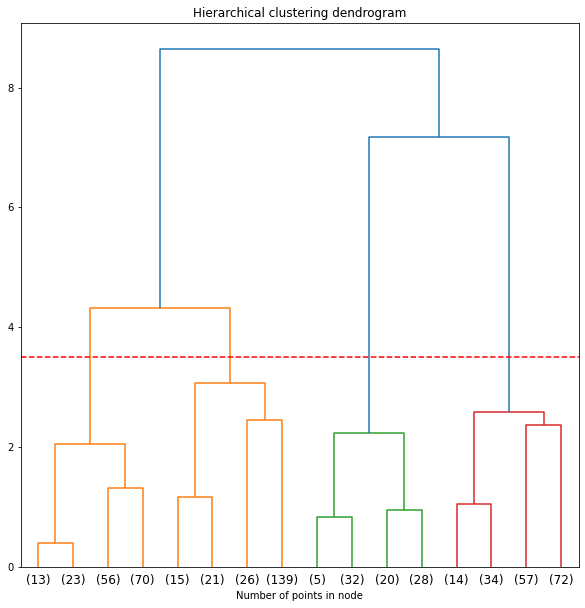

<Figure size 432x288 with 0 Axes>

In [34]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 3.5, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()
plt.savefig('cluster_map.png', dpi = 600)

In [17]:
model15 = AgglomerativeClustering(linkage="ward", distance_threshold = 3.5, n_clusters=None)
model15.fit(a)
a["Aggl_clus_15"] = model15.labels_

/tmp/ipykernel_503/2953483773.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 3.5')

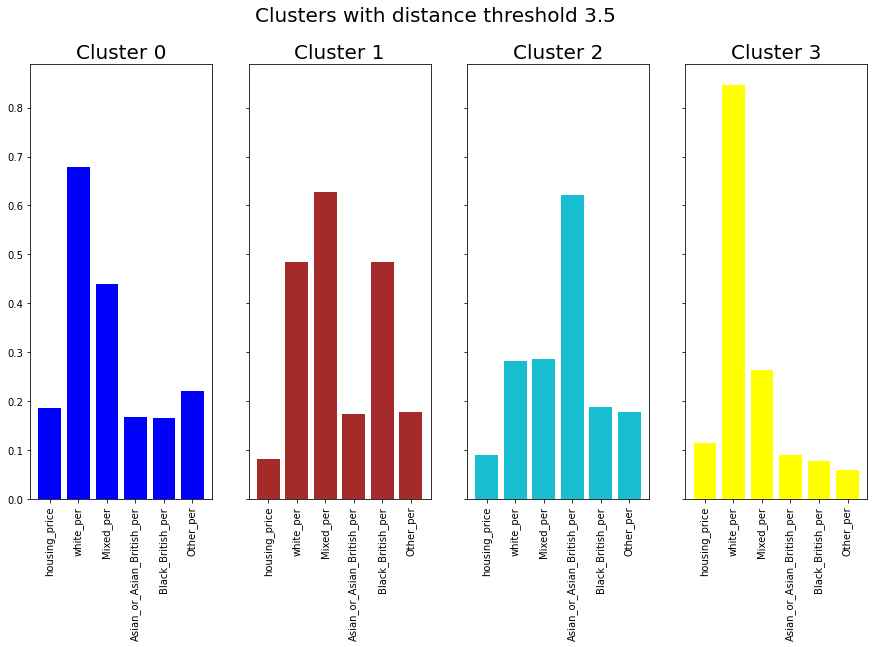

In [26]:
agglom_means =a.groupby("Aggl_clus_15").mean()
agglom_means_T = agglom_means.T.round(4)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T.reset_index(inplace=True)
colors = ["blue", "brown", "tab:cyan","yellow"]
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        
plt.suptitle("Clusters with distance threshold 3.5", fontsize = 20)

In [19]:
agglom_means

,housing_price,white_per,Mixed_per,Asian_or_Asian_British_per,Black_British_per,Other_per
Aggl_clus_15,,,,,,
0,0.185662,0.677721,0.438751,0.167080,0.166449,0.219720
1,0.082377,0.484192,0.626954,0.172676,0.485193,0.178106
2,0.088839,0.281762,0.285378,0.622424,0.188016,0.176756
3,0.115126,0.846880,0.262749,0.089038,0.077471,0.058998


In [20]:
agglom_means_T

Aggl_clus_15,index,0,1,2,3
0,housing_price,0.186,0.082,0.089,0.115
1,white_per,0.678,0.484,0.282,0.847
2,Mixed_per,0.439,0.627,0.285,0.263
3,Asian_or_Asian_British_per,0.167,0.173,0.622,0.089
4,Black_British_per,0.166,0.485,0.188,0.077
5,Other_per,0.220,0.178,0.177,0.059
